In [62]:
import numpy as np
import matplotlib.pyplot as plt


### **Aircraft Type:**

Small general aviation aircraft (like a Cessna 172)

### Wing Geometry:

- **Wing span:** 11 m
- **Semi-span (for one wing):** 5.5 m
- **Chord:** 1.5 m
- **Wing area (both wings):** ~16 m²
- **Taper:** neglected (simplified as rectangular)

In [63]:
wing_span = 11000 #mm
wing_semispan = wing_span/2 #meter
chord = 1500 #mm
wing_area = wing_span*chord #meter square

### Aircraft Mass and Load:

**Aircraft gross weight (W):** 1100 kg
#### Flight Load Cases:
1. **Steady Level Flight (1g):**
    - Lift = Weight = **10,800 N**
2. **Maneuver Load Case (e.g., 3.8g for normal category)**
    - Lift = 3.8×10,800 = **41,040 N**

In [64]:
gross_weight = 1100 #kg
g_steady = 9.81 #m/s^
g_maneuver = 3.8*g_steady #m/s^2
lift_steady = gross_weight*g_steady #N
print(f"Lift generated for steady state of flight is {lift_steady} N")
lift_maneuver = gross_weight*g_maneuver #N
print(f"Lift generated for sharp maneuver of flight is {round(lift_maneuver,4)} N")

Lift generated for steady state of flight is 10791.0 N
Lift generated for sharp maneuver of flight is 41005.8 N


### Simplify Load Distribution
Assume **elliptical lift distribution** along the wing span.
$$ 
M_{max} = \frac{qb}{8} 
$$
q = lift per wing = 41040/2 = 20520 N <br>
b = wing span = 11 m<br>
M_max = 28215 Nm

In [65]:
q = lift_maneuver/2 #N
M_max = (q*wing_span)/8 #Nmm
print(f"Maximum Moment acting at wing root {round(M_max,4)} Nmm")

Maximum Moment acting at wing root 28191487.5 Nmm


## Spar Geometry (Rectangular I-Beam Style)

Assume a simple **rectangular spar section**:

- Height of spar web (h): 150 mm
- Flange width: 40 mm
- Flange thickness: 6 mm
- Web thickness: 4 mm
We'll calculate the section modulus (Z) for this spar to find if it’s strong enough

In [66]:
h_spar = 150 #mm
b_spar = 40 #mm
t_spar = 6 #mm
t_web = 4 #mm
h_spar

150

**Bernoulli's Bending Theory**
$$
\frac{M}{I} = \frac{\sigma}{y}
$$
**Section Modulus**
$$
Z = \frac{I}{y}
$$
**Moment of Inertia**
$$
I_x = \frac{bh^3}{12} - \frac{(b-t_{web})(h-t_{spar})^3}{12}
$$

In [67]:
moment_inertia = ((b_spar)*(h_spar)**3)/12 - ((b_spar-t_web)*(h_spar-t_spar)**3)/12
print(f"Moment of Inertia is {round(moment_inertia,4)} mm^4")
section_modulus = moment_inertia/(h_spar/2)
print(f"Section Modulus is {round(section_modulus,4)} mm^3")
stress = M_max/section_modulus
print(f"Maximum stress acting at wing root on the wing spar is {round(stress,4)} N/mm^2")

Moment of Inertia is 2292048.0 mm^4
Section Modulus is 30560.64 mm^3
Maximum stress acting at wing root on the wing spar is 922.477 N/mm^2


## **Material Reference: Aluminum Alloys for Wing Spars**
### Common aerospace aluminum alloys:
- **2024-T3**
    - Yield strength: ~325 MPa
    - Ultimate tensile strength: ~470 MPa
    - Young’s modulus: ~70 GPa
**Factor of safety** considered is 1.5
The designed section fo the I-beam is experiences stress above the yield strength of the material. Redesigning the section of the I-beam for maximum allowable stress of  200 MPa 

In [68]:
max_allowable_stress = 200 #MPa
print(f"The maximum allowable stress in the wing spar is {max_allowable_stress} MPa")
new_section_modulus = M_max/max_allowable_stress 
print(f"The new section modulus is {round(new_section_modulus,4)} mm^3")


The maximum allowable stress in the wing spar is 200 MPa
The new section modulus is 140957.4375 mm^3


New moment of Inertia is 17919714.6667 mm^4
New section Modulus is 143357.7173 mm^3
Maximum stress acting at wing root on the wing spar is 196.6513 N/mm^2
Height = 250 mm, Flange Width = 50 mm, Flange Thickness = 12 mm, Web Thickness = 8 mm


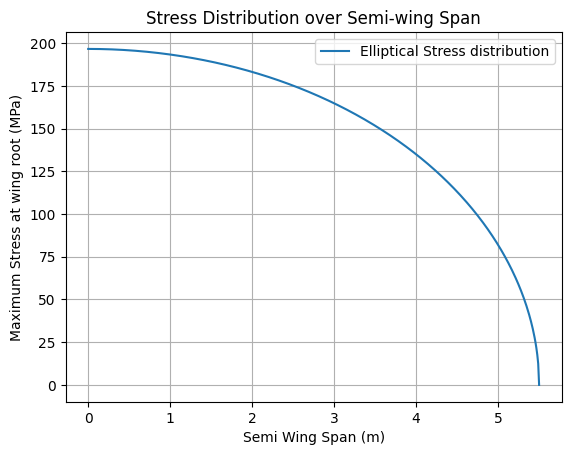

In [69]:

h_spar = 250 #mm
b_spar = 50 #mm
t_spar = 12 #mm
t_web = 8 #mm
area_spar = (b_spar*h_spar) - ((h_spar-(2*t_spar))*(b_spar-t_web))

moment_inertia_new = ((b_spar)*(h_spar)**3)/12 - ((b_spar-t_web)*(h_spar-t_spar)**3)/12
print(f"New moment of Inertia is {round(moment_inertia_new,4)} mm^4")
new_section_modulus = moment_inertia_new/(h_spar/2)
print(f"New section Modulus is {round(new_section_modulus,4)} mm^3")
new_stress = M_max/new_section_modulus
print(f"Maximum stress acting at wing root on the wing spar is {round(new_stress,4)} N/mm^2")
print(f"Height = {h_spar} mm, Flange Width = {b_spar} mm, Flange Thickness = {t_spar} mm, Web Thickness = {t_web} mm")

x_vals = np.linspace(0,wing_semispan,500)
# stress_wing_span = new_stress*(1-x_vals/wing_semispan)
stress_wing_span = new_stress * np.sqrt(1 - (x_vals/wing_semispan)**2)
plt.plot(x_vals/1000, stress_wing_span, label = "Elliptical Stress distribution")
plt.title("Stress Distribution over Semi-wing Span")
plt.xlabel("Semi Wing Span (m)")
plt.ylabel("Maximum Stress at wing root (MPa)")
plt.legend()
plt.grid()
plt.show()


**7075-T6**
    - Yield strength: ~505 MPa
    - Ultimate tensile strength: ~570 MPa
    - Young’s modulus: ~71 GPa

**Factor of safety** considered is 1.5
Redesigning the section of the I-beam for maximum allowable stress of  330 MPa 

In [70]:
max_allowable_stress = 330 #MPa
print(f"The maximum allowable stress in the wing spar is {max_allowable_stress} MPa")
new_section_modulus = M_max/max_allowable_stress 
print(f"The new section modulus is {round(new_section_modulus,4)} mm^3")

The maximum allowable stress in the wing spar is 330 MPa
The new section modulus is 85428.75 mm^3


New moment of Inertia is 10117848.1667 mm^4
New section Modulus is 86109.3461 mm^3
Maximum stress acting at wing root on the wing spar is 327.3917 N/mm^2
Height = 235 mm, Flange Width = 40 mm, Flange Thickness = 8 mm, Web Thickness = 6 mm


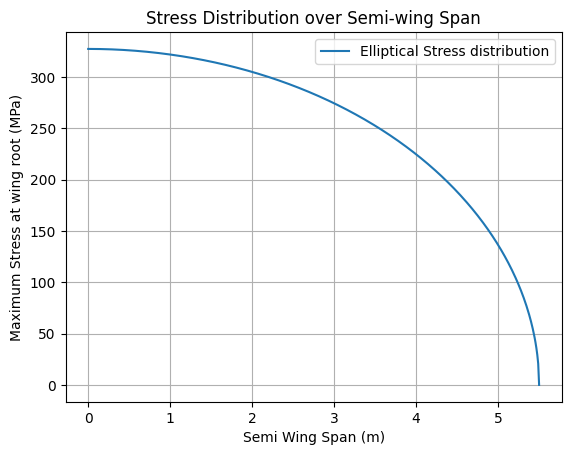

In [71]:
h_spar = 235 #mm
b_spar = 40 #mm
t_spar = 8 #mm
t_web = 6 #mm
area_spar = (b_spar*h_spar) - ((h_spar-(2*t_spar))*(b_spar-t_web))

moment_inertia_new = ((b_spar)*(h_spar)**3)/12 - ((b_spar-t_web)*(h_spar-t_spar)**3)/12
print(f"New moment of Inertia is {round(moment_inertia_new,4)} mm^4")
new_section_modulus = moment_inertia_new/(h_spar/2)
print(f"New section Modulus is {round(new_section_modulus,4)} mm^3")
new_stress = M_max/new_section_modulus
print(f"Maximum stress acting at wing root on the wing spar is {round(new_stress,4)} N/mm^2")
print(f"Height = {h_spar} mm, Flange Width = {b_spar} mm, Flange Thickness = {t_spar} mm, Web Thickness = {t_web} mm")

x_vals = np.linspace(0,wing_semispan,500)
# stress_wing_span = new_stress*(1-x_vals/wing_semispan)
stress_wing_span = new_stress * np.sqrt(1 - (x_vals/wing_semispan)**2)
plt.plot(x_vals/1000, stress_wing_span, label = "Elliptical Stress distribution")
plt.title("Stress Distribution over Semi-wing Span")
plt.xlabel("Semi Wing Span (m)")
plt.ylabel("Maximum Stress at wing root (MPa)")
plt.legend()
plt.grid()
plt.show()